/tmp/ipython-input-149581713.py:157: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




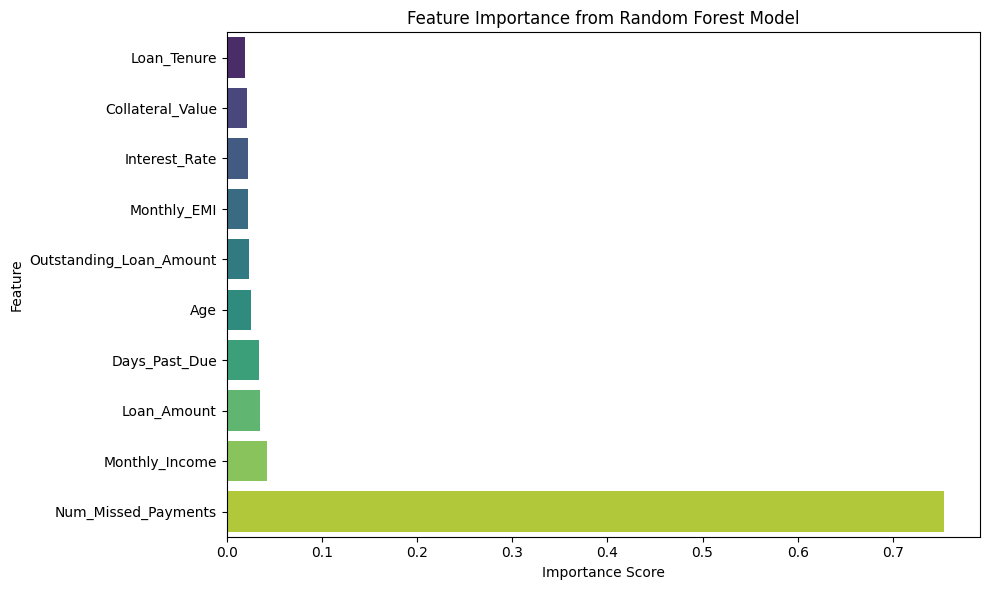

1.0
0.984
1.0
1.0
0.944
Random Forest


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [3]:

import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score
import matplotlib.pyplot as plt
import seaborn as sns
loan_data=pd.read_csv("/content/loan-recovery (1).csv")
loan_data.head()
loan_data['Recovery_Status'].unique()
loan_data.describe()
import plotly.graph_objects as go
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import gaussian_kde
fig=px.histogram(loan_data,x='Loan_Amount',nbins=30,marginal='violin',opacity=0.6,title="Loan Amount Distribution WRT monthly income",
                labels={'Loan_Amount':'Loan Amount (in $)','Monthly Income':'Monthy Income(in$)'},color_discrete_sequence=['royalblue'])
x_vals = np.linspace(loan_data['Loan_Amount'].min(), loan_data['Loan_Amount'].max(), 200)
kde = gaussian_kde(loan_data['Loan_Amount'])
y_vals = kde(x_vals) #Histograms are discrete, but KDE gives a smooth curve showing the underlying distribution pattern — this is
fig.add_trace(go.Scatter(
    x=x_vals,
    y=y_vals,
    mode='lines',
    name='Density Curve',
    line=dict(color='red', width=2)
))
scatter=px.scatter(loan_data,x='Loan_Amount',y='Monthly_Income',color='Loan_Amount',
                   color_continuous_scale ='Viridis',size=loan_data['Loan_Amount'],hover_name=loan_data.index)
for trace in scatter.data:
    fig.add_trace(trace)
fig.update_layout(
    annotations=[
        dict(
            x=max(loan_data['Loan_Amount']) * 0.8, y=max(loan_data['Monthly_Income']),
            text="Higher Loan Amounts are linked to Higher Income Levels",
            showarrow=True,
            arrowhead=2,
            font=dict(size=12, color="red")
        )
    ],
    xaxis_title="Loan Amount (in $)",
    yaxis_title="Monthly Income (in $)",
    template="plotly_white",
    showlegend=True
)
fig.show()
fig=px.histogram(loan_data,x='Payment_History',color='Recovery_Status',barmode='group',title=' How payment history affect payment recovery',
                labels={'Payment_History':'Payment History'},color_discrete_map={'Recovered':'green',"Not Recovered":'Red'})
fig.update_layout(
    xaxis_title='Payment History',
    yaxis_title='Recovery_Status',
    legend_title='Recovery Status',
    template='plotly_white'
)
fig.show()
fig=px.box(loan_data,x='Recovery_Status',y='Num_Missed_Payments',title='How missed payments affects recovery status',
           labels={'Recovery_status':'recovery status','Num_Missed_Payments':'Missed payments'},
          color='Recovery_Status',color_discrete_map={'Recovered':'green','Not_Recovered':'red'},points='all')
fig.update_layout(
    xaxis_title='Recovery Status',
    yaxis_title='Number of missed payments',
    template='plotly_white'
)
fig.show()
fig=px.scatter(loan_data,x='Loan_Amount',y='Monthly_Income',color='Recovery_Status',hover_data={'Monthly_Income':True,'Loan_Amount':True},
              title='How loan amount and monthly income affects recovery of loan',
               labels={'Monthly_Income':'Monthly_Income (in $)','Loan_Amount':'Loan Amount(in $'},
              color_discrete_map={'Recovered':'green','Not Recovered':'red'},size_max=30)
fig.add_annotation(
    x=max(loan_data['Loan_Amount']),
    y=max(loan_data['Monthly_Income']),
    text='Higher loans may still get recovered if income is high',
    showarrow=True,
    arrowhead=2,
    font=dict(size=12,color='red')
 )
fig.update_layout(
    xaxis_title='Monthly Income($)',
    yaxis_title='Loan Amount($)',
    template='plotly_white'
)
fig.show()
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
features=['Age','Monthly_Income','Loan_Tenure','Interest_Rate','Collateral_Value','Monthly_EMI','Num_Missed_Payments', 'Days_Past_Due']
scaler=StandardScaler()
loan_data_scaled=scaler.fit_transform(loan_data[features])
optimal_k=4
kmeans=KMeans(n_clusters=optimal_k,n_init=10,random_state=42)
loan_data['Borrower_segment']=kmeans.fit_predict(loan_data_scaled)
fig=px.scatter(loan_data,x='Monthly_Income',y='Loan_Amount',color=loan_data['Borrower_segment'].astype(str),
size='Loan_Amount',hover_data={'Monthly_Income':True,'Loan_Amount':True},title='Borrower Segments based on monthly income and loan amounts',
labels={'Monthly_Income':'Monthly income($)','Loan_Amount':'Loan Amount($)',"Borrower_Segment": "Segment"},
color_discrete_sequence=px.colors.qualitative.Vivid)
fig.add_annotation(
    x=loan_data['Monthly_Income'].mean(),
    y=loan_data['Loan_Amount'].max(),
    text="Higher loans are clustered in specific income groups",
    showarrow=True,
    arrowhead=2,
    font=dict(size=12,color='red')
)
fig.update_layout(
    xaxis_title='Monthly Income($)',
    yaxis_title='Loan Amount($)',
    template='plotly_white',
    legend_title='Borrower Segment',
    width=1000,
    height=700
)
loan_data['Segment_name']=loan_data['Borrower_segment'].map({
    0:'Moderate income high loans burden',
    1:'High Income, Low Default Risk',
    2: 'Moderate Income, Medium Risk',
    3: 'High Loan, Higher Default Risk'
})
fig.show()
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
loan_data['Segment_name'].value_counts()
loan_data['High_Risk_Flag']=loan_data['Segment_name'].apply(lambda x:1 if x in ['High Loan, Higher Default Risk','Moderate income high loans'] else 0)
features=['Age','Monthly_Income','Loan_Amount', 'Loan_Tenure','Interest_Rate','Collateral_Value','Outstanding_Loan_Amount', 'Monthly_EMI','Num_Missed_Payments'
         ,'Days_Past_Due']
X=loan_data[features]
y=loan_data['High_Risk_Flag']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42,stratify=y)
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)
risk_score=rf_model.predict_proba(X_test)[:,1]
loan_data_test=X_test.copy()
loan_data_test['Risk_Score']=risk_score
loan_data_test['Prdicted_High_Risk']=(loan_data_test['Risk_Score']>0.5).astype(int)
loan_data_test=loan_data_test.merge(loan_data[['Borrower_ID', 'Segment_name', 'Recovery_Status', 'Collection_Method', 'Collection_Attempts', 'Legal_Action_Taken']]
                                   ,left_index=True, right_index=True)
loan_data_test
def assign_recovery_strategy(risk_score):
    if risk_score > 0.75:
        return "Immediate legal notices & aggressive recovery attempts"
    elif 0.50 <= risk_score <= 0.75:
        return "Settlement offers & repayment plans"
    else:
        return "Automated reminders & monitoring"
loan_data_test['Recovery_Strategy'] = loan_data_test['Risk_Score'].apply(assign_recovery_strategy)
loan_data_test.head()
loan_data.columns
importances = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=True)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
importance_df.sort_values(by='Importance', ascending=False).head(5)
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC()
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(acc)
    logging.info(f"{name} Accuracy: {acc:.4f}")
best_model = max(results, key=results.get)
print(best_model)
logging.info(f"Best Model: {best_model} with Accuracy: {results[best_model]:.4f}")